In [31]:
# Import libraries
import os
import numpy as np
import skimage.io
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scikitplot.metrics import plot_confusion_matrix, plot_roc


In [51]:
# Function to load data with pixel normalization
def load_and_resize_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    
    class_to_label = {class_name: i for i, class_name in enumerate(directories)}
    
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".jpg")]
        label = class_to_label[d]
        for f in file_names:
            img = skimage.io.imread(f)
            img_resized = resize(img, (28, 28))
            gray_img = rgb2gray(img_resized)
            images.append(gray_img.flatten())
            labels.append(label)
    return images, labels, class_to_label



In [52]:
train_data_directory = "C:/Food-101-minimized-main/train"
test_data_directory = "C:/Food-101-minimized-main/test"

# Load training data
train_data_normalized, train_labels_normalized, class_to_label  = load_and_resize_data(train_data_directory)

# Load testing data
test_data_normalized, test_labels_normalized, class_to_label  = load_and_resize_data(test_data_directory)




C:\Users\Menna\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Menna\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
C:\Users\Menna\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 3. 
  warnings.warn(str(msg))


In [53]:
print(len(train_images))

print(len(test_images))

print(class_to_label)


1400
600
{'cheesecake': 0, 'hamburger': 1}


In [69]:
# Normalize pixel values between 0 and 1
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data_normalized)
test_data_normalized = scaler.fit_transform(test_data_normalized)



In [70]:
# Create a logistic regression model (you can replace this with any other model)
model = LogisticRegression()




In [71]:
# Train the model
model.fit(train_data_normalized, train_labels_normalized)




LogisticRegression()

In [72]:
# Make predictions on the test set
y_pred = model.predict(test_data_normalized)




In [73]:
# Evaluate the model
accuracy = accuracy_score(test_labels_normalized, y_pred)
classification_report_str = classification_report(test_labels_normalized, y_pred)
conf_matrix = confusion_matrix(test_labels_normalized, y_pred)


In [75]:
# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6216666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.31      0.45       300
           1       0.58      0.93      0.71       300

    accuracy                           0.62       600
   macro avg       0.70      0.62      0.58       600
weighted avg       0.70      0.62      0.58       600

Confusion Matrix:
[[ 94 206]
 [ 21 279]]


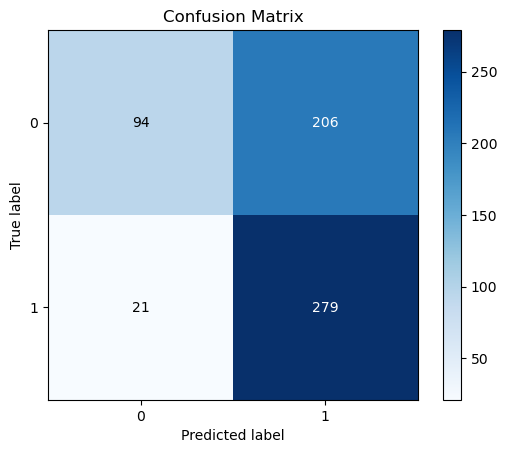

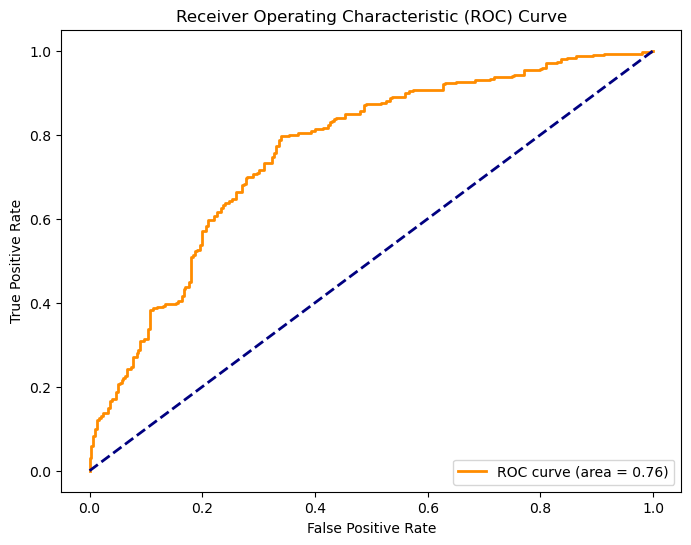

In [74]:
# Plot confusion matrix
plot_confusion_matrix(test_labels_normalized, y_pred, title='Confusion Matrix')
plt.show()

# Plot ROC curve
y_probs = model.predict_proba(test_data_normalized)
fpr, tpr, thresholds = roc_curve(test_labels_normalized, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [76]:
def extract_hog_features(images):
    hog_features_list = []
    
    for img in images:
        # Reshape the flattened image to its original shape
        img = img.reshape((28, 28))
        
        # Calculate HOG features directly on the grayscale image
        hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
        
        # Append the HOG features
        hog_features_list.append(hog_features)
    
    return np.array(hog_features_list)



In [83]:
# Example usage
train_data_with_features = extract_hog_features(train_images)
test_data_with_features = extract_hog_features(test_images)


In [84]:
# Create a logistic regression model
model = LogisticRegression()

In [85]:
# Train the model
model.fit(train_data_normalized, train_labels_normalized) 

LogisticRegression()

In [86]:
# Make predictions on the test set
y_pred = model.predict(test_data_normalized)

In [87]:
# Evaluate the model
accuracy = accuracy_score(test_labels_normalized, y_pred)  
classification_report_str = classification_report(test_labels_normalized, y_pred)
conf_matrix = confusion_matrix(test_labels_normalized, y_pred)



In [88]:
# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.705
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       300
           1       0.69      0.73      0.71       300

    accuracy                           0.70       600
   macro avg       0.71      0.70      0.70       600
weighted avg       0.71      0.70      0.70       600

Confusion Matrix:
[[203  97]
 [ 80 220]]


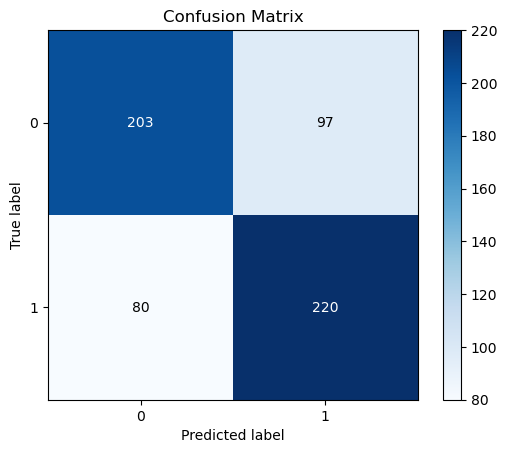

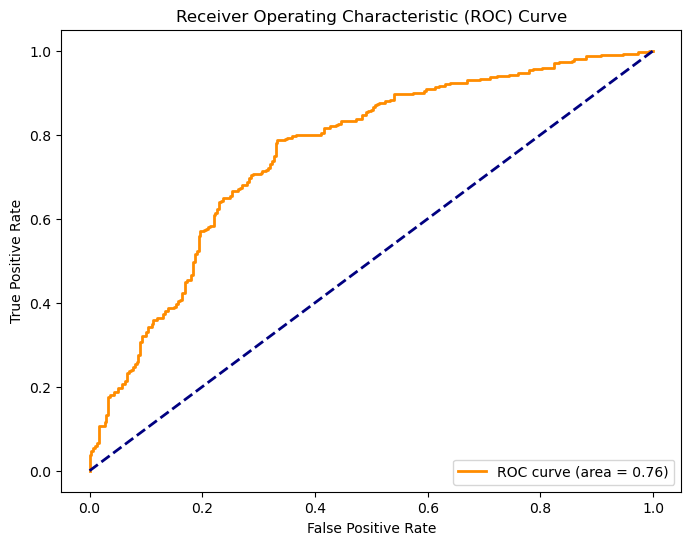

In [89]:
# Plot confusion matrix
plot_confusion_matrix(test_labels_normalized, y_pred, title='Confusion Matrix')
plt.show()

# Plot ROC curve
y_probs = model.predict_proba(test_data_normalized)
fpr, tpr, thresholds = roc_curve(test_labels_normalized, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()